In [128]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier      # 분류
# from sklearn.neighbors import KNeighborsRegressor       # 회귀 예측
# from sklearn.linear_model import LinearRegression       # 선형 회귀
# from sklearn.preprocessing import PolynomialFeatures    # 다항특성을 만들어주는 라이브러리
# from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import requests
import random
import glob,os.path,re
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False

In [129]:
import pandas as pd
df = pd.read_csv('https://bit.ly/fish_csv')
df.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [130]:
# 분류하는 형태 7가지
df['Species'].unique()
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [131]:
# 컬럼에 문자타입이 존재하는지 확인
# 문자타입이면 머신러닝을 돌릴수가 없음. > 삭제, 코드변경
# 코드변경
# - 1. 문자 아스키 코드 변경 - 표준점수
# - 2. 원핫인코딩 방식  

In [132]:
# pandas 원핫인코딩 함수
df_dumm = pd.get_dummies(df['Species'])
df_dumm.iloc[36]
# df['Species']

Bream        False
Parkki       False
Perch        False
Pike         False
Roach         True
Smelt        False
Whitefish    False
Name: 36, dtype: bool

In [133]:
# 데이터 data, result 분리
d_target = np.array(df['Species'])
d_input = df.iloc[:,1:].to_numpy()
d_input

array([[2.42000e+02, 2.54000e+01, 3.00000e+01, 1.15200e+01, 4.02000e+00],
       [2.90000e+02, 2.63000e+01, 3.12000e+01, 1.24800e+01, 4.30560e+00],
       [3.40000e+02, 2.65000e+01, 3.11000e+01, 1.23778e+01, 4.69610e+00],
       [3.63000e+02, 2.90000e+01, 3.35000e+01, 1.27300e+01, 4.45550e+00],
       [4.30000e+02, 2.90000e+01, 3.40000e+01, 1.24440e+01, 5.13400e+00],
       [4.50000e+02, 2.97000e+01, 3.47000e+01, 1.36024e+01, 4.92740e+00],
       [5.00000e+02, 2.97000e+01, 3.45000e+01, 1.41795e+01, 5.27850e+00],
       [3.90000e+02, 3.00000e+01, 3.50000e+01, 1.26700e+01, 4.69000e+00],
       [4.50000e+02, 3.00000e+01, 3.51000e+01, 1.40049e+01, 4.84380e+00],
       [5.00000e+02, 3.07000e+01, 3.62000e+01, 1.42266e+01, 4.95940e+00],
       [4.75000e+02, 3.10000e+01, 3.62000e+01, 1.42628e+01, 5.10420e+00],
       [5.00000e+02, 3.10000e+01, 3.62000e+01, 1.43714e+01, 4.81460e+00],
       [5.00000e+02, 3.15000e+01, 3.64000e+01, 1.37592e+01, 4.36800e+00],
       [3.40000e+02, 3.20000e+01, 3.73

In [134]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(d_input,d_target,random_state=42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [135]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.8067226890756303
0.85


### 반복횟수를 늘려서 정답을 높여보기

In [136]:
lr = LogisticRegression(C=20,max_iter=1000)
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.9327731092436975
0.925


### 경사하강법
머신러닝튜닝, 기존에 훈련된 모델에서 다시 훈련

In [137]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss',max_iter=10,random_state=42)
sc.fit(train_scaled,train_target)

c:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [138]:
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.773109243697479
0.775


In [139]:
classes = np.unique(train_target)
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [140]:
# 데이터의 일부를 가져와서 훈련해서 target을 맞춤.
# 일부만 가져오다보니 전체 target을 알 지 못함.
# 전체 타겟을 알려줘야 함.

sc.partial_fit(train_scaled,train_target,classes=classes)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8151260504201681
0.85


In [141]:
# 반복
train_score = []
test_score = []
for _ in range(300):
    sc.partial_fit(train_scaled,train_target,classes=classes)
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))
    

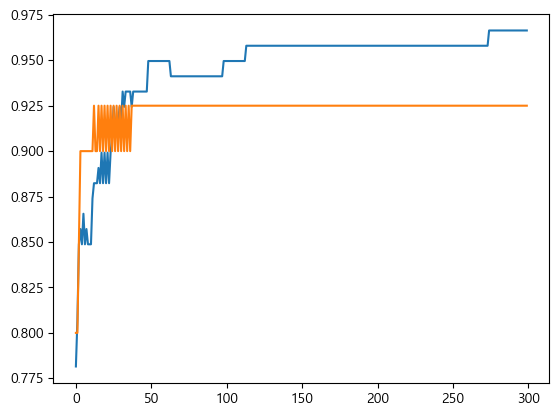

In [143]:
plt.plot(train_score)
plt.plot(test_score)

In [145]:
sc = SGDClassifier(loss='log_loss',max_iter=80,tol=None,random_state=42)   # 반복횟수가 100번 멈춤
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.9411764705882353
0.925
